# **Assignment on Classification**

Do the following in the iris dataset

1. Read the dataset to python environment
2. Do the necessary pre-processing steps
3. Find out which classification model gives the best result (try all the
classification algorithms discussed in the session)

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# **1.Reading the data to python environment**

In [143]:
data=pd.read_excel('/content/iris.xls')

In [144]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# **Preprocessing**

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [146]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

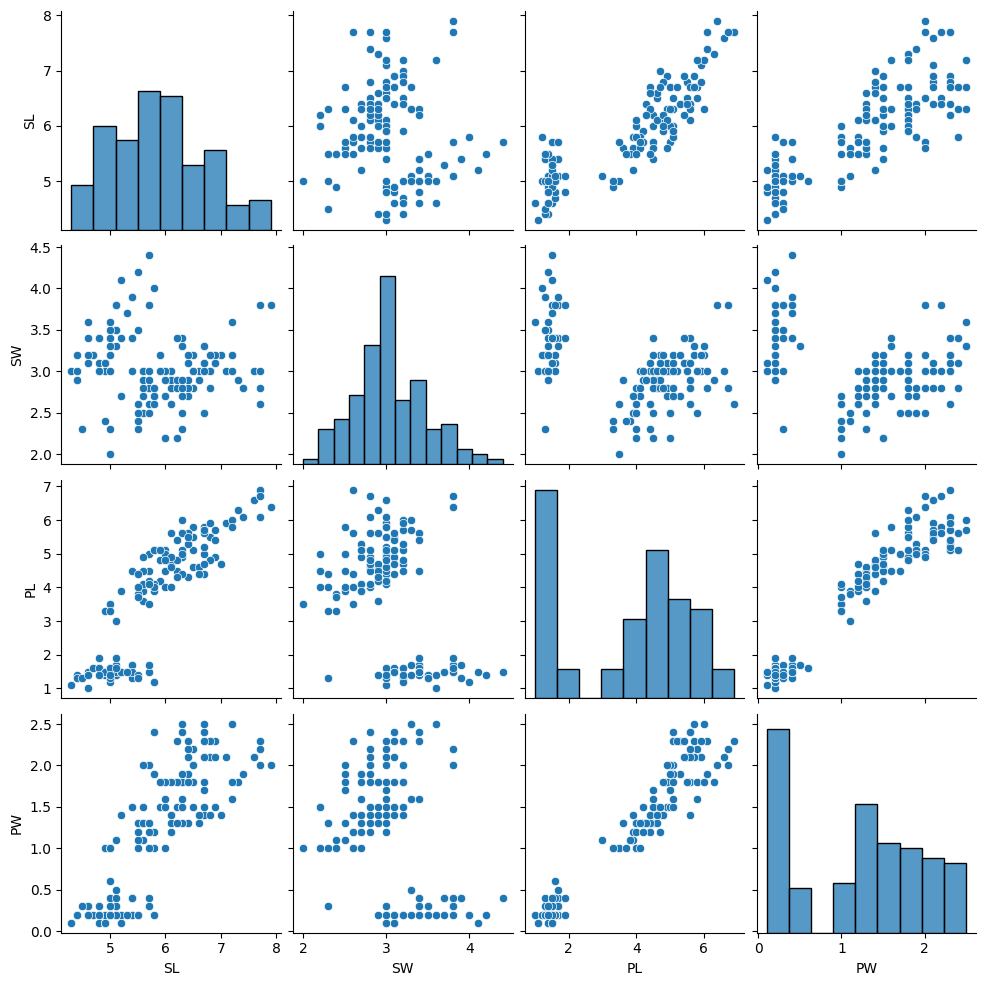

In [147]:
sns.pairplot(data)

<ipython-input-148-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

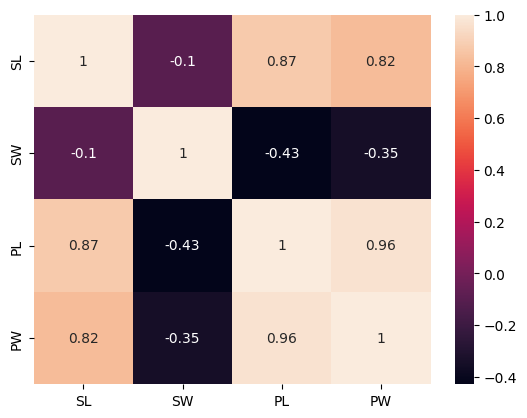

In [148]:
sns.heatmap(data.corr(),annot=True)

There is strong correlation between PW and PL.Also between PW and SL

<ipython-input-149-d6fab494117d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Classification',data=data,palette='hls')


<Axes: xlabel='Classification', ylabel='count'>

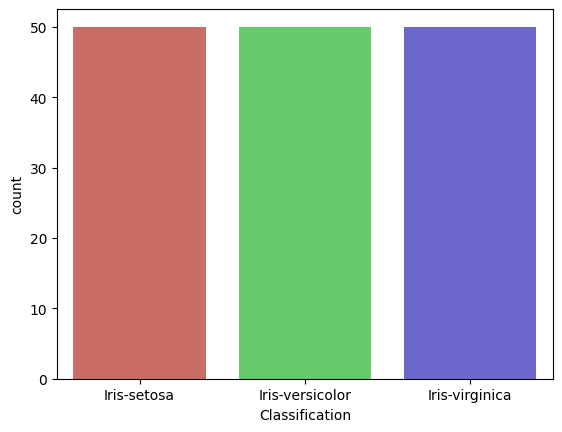

In [149]:
sns.countplot(x='Classification',data=data,palette='hls')

Same number of recors for the three species of flowers

In [150]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


[]

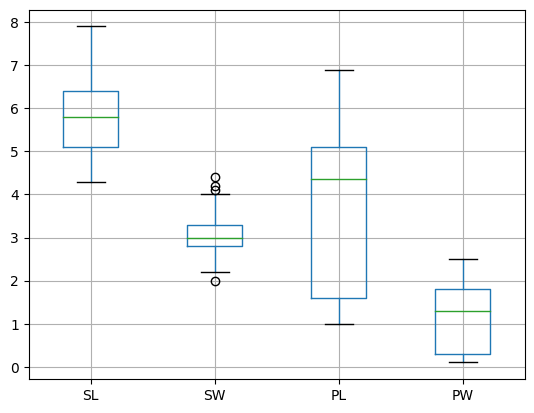

In [151]:
data.boxplot(return_type='dict')
plt.plot()

Outliers can be seen for SW

# Handling Null values

In [152]:
PW_gp=data.groupby(data['PW'])
PW_gp.mean()

<ipython-input-152-3771b9d15937>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  PW_gp.mean()


,SL,SW,PL
PW,,,
0.1,4.833333,3.233333,1.416667
0.2,4.980769,3.373077,1.450000
0.3,4.971429,3.328571,1.428571
0.4,5.333333,3.785714,1.571429
0.5,5.100000,3.300000,1.700000
0.6,5.000000,NaN,1.600000
1.0,5.414286,2.371429,3.628571
1.1,5.400000,2.450000,3.566667
1.2,5.780000,2.740000,4.240000


In [153]:
data.head()


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [154]:
data.dropna(inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              131 non-null    float64
 1   SW              131 non-null    float64
 2   PL              131 non-null    float64
 3   PW              131 non-null    float64
 4   Classification  131 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.1+ KB


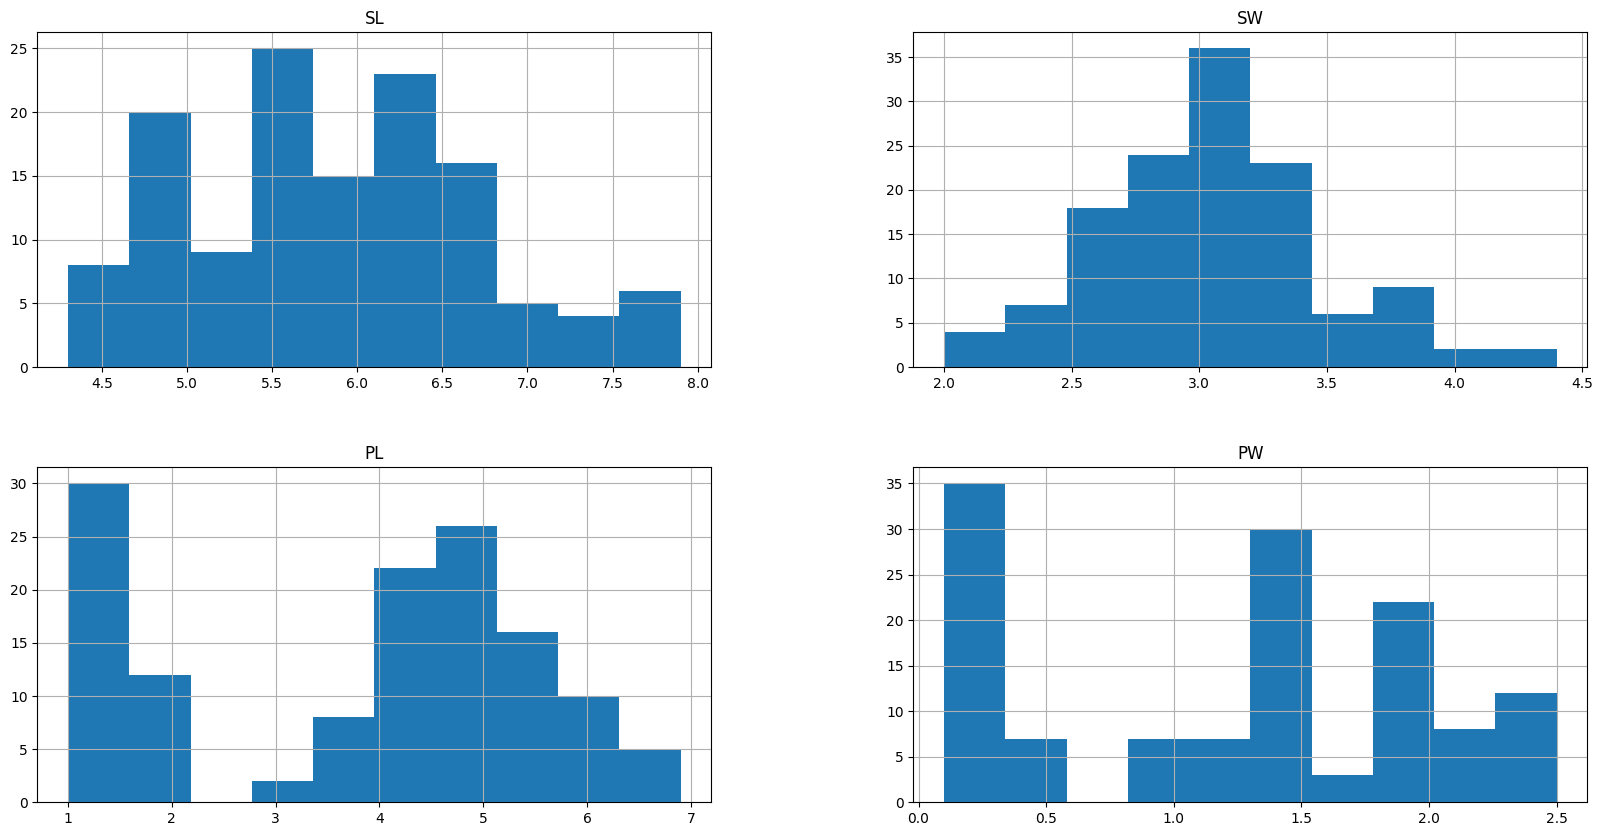

In [155]:
graphs = data.select_dtypes(include = ['float64','int64'])
graphs.hist(figsize = (20,10))
plt.show()

# Handling outliers

[]

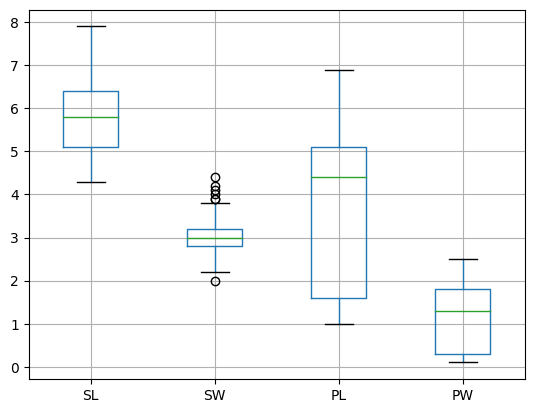

In [156]:
data.boxplot(return_type='dict')
plt.plot()

# Outlier handling for SW

outlier handling for column SW
Q1 is:  2.8
Q2 is:  3.0
Q3 is: 3.2
0.40000000000000036
lower whisker:  2.1999999999999993
upper whisker:  3.8000000000000007
outliers for  SW [3.9, 4.0, 4.4, 3.9, 4.1, 4.2, 2.0]
7
outliers after handling: []


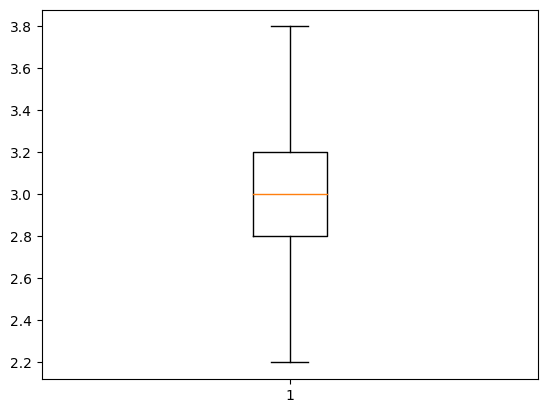

In [157]:

num_columns=['SW']
for i in num_columns:
  print("outlier handling for column",i)
  Q1 = data[i].quantile(0.25)
  Q2 = data[i].quantile(0.50)
  Q3 = data[i].quantile(0.75)

  print("Q1 is: ",Q1)
  print("Q2 is: ",Q2)
  print('Q3 is:',Q3)

  IQR = Q3-Q1
  print(IQR)

  lower_lim = Q1 - 1.5*IQR
  upper_lim = Q3 + 1.5*IQR

  print("lower whisker: ",lower_lim)
  print("upper whisker: ",upper_lim)

  outlier =[]
  for x in data['SW']:
    if((x>upper_lim) | (x<lower_lim)):
      outlier.append(x)

  print('outliers for ',i,outlier)
  print (len(outlier))

  data[i] = data[i].clip(lower=lower_lim, upper=upper_lim)

  outlier_1 =[]
  for x in data[i]:
    if((upper_lim)):
      outlier.append(x)

  print('outliers after handling:',outlier_1)

  plt.boxplot(data['SW'])
  plt.show()

[]

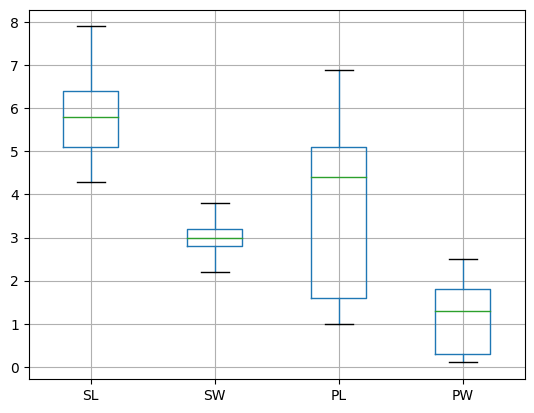

In [158]:
data.boxplot(return_type='dict')
plt.plot()

In [159]:
data.Classification.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

The classification column is selected as target variable and is an object data. So we are using label encoding for the column classification.

In [160]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.8,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# **Label encoding the column Classification**

In [161]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.8,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
148,6.2,3.4,5.4,2.3,2


# Logistic regression label encoding

In [162]:
y=data['Classification']
x=data.drop(['Classification'],axis=1)

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

In [164]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [165]:
log_model=log_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [166]:
y_log_pred=log_reg.predict(x_test)

In [167]:
y_log_pred

array([1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 2, 1, 0, 0,
       2, 0, 2, 1, 1])

In [168]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [169]:
confusion_matrix(y_test,y_log_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]])

In [170]:
print('Accuracy is',accuracy_score(y_test,y_log_pred))

print(confusion_matrix(y_test,y_log_pred))

Accuracy is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0  8]]


# **KNN**

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
metric_k=[]
neighbors=np.arange(3,15)

In [173]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

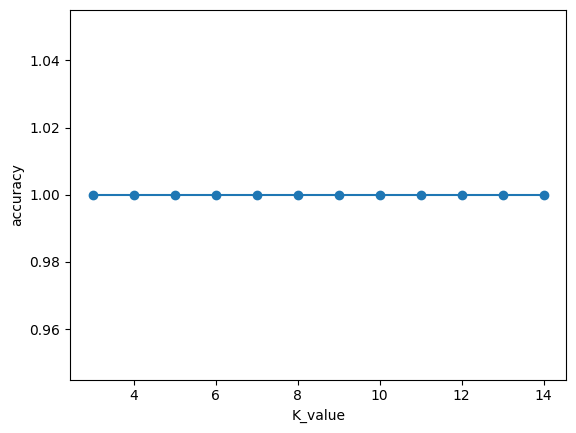

In [174]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

After standard scaling

In [175]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [176]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [178]:
metric_k=[]
neighbors=np.arange(3,15)

In [179]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

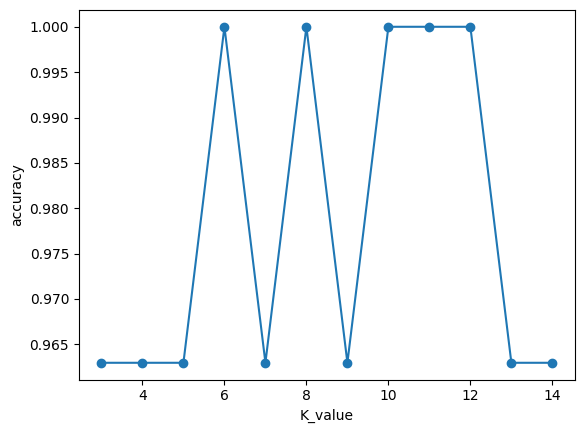

In [180]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [181]:
classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)

In [182]:
print('Accuracy is',accuracy_score(y_test,y_pred_knn))

print(confusion_matrix(y_test,y_pred_knn))

Accuracy is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0  8]]


# **SVM model**

In [183]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
sv_cl.fit(x_train,y_train)

SVC(kernel='linear')

In [184]:
y_pred=sv_cl.predict(x_test)

In [185]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [186]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.9259259259259259


In [187]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  7  2]
 [ 0  0  8]]


In [188]:
#SVM model

from sklearn.svm import SVC
sv_cl=SVC(kernel='poly')
sv_cl.fit(x_train,y_train)


y_pred=sv_cl.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score

print('Accuracy is',accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))



Accuracy is 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0  8]]


In [189]:
#SVM model


from sklearn.svm import SVC
sv_cl=SVC(kernel='rbf')
sv_cl.fit(x_train,y_train)


y_pred=sv_cl.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score

print('Accuracy is',accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))


Accuracy is 0.9629629629629629
[[10  0  0]
 [ 0  8  1]
 [ 0  0  8]]


# **Decision Tree**

In [190]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [191]:
print('Accuracy is',accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

Accuracy is 0.9629629629629629
[[10  0  0]
 [ 0  8  1]
 [ 0  0  8]]


#**Random forest**

In [192]:

from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)

In [193]:
print('Accuracy is',accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))

Accuracy is 0.9629629629629629
[[10  0  0]
 [ 0  8  1]
 [ 0  0  8]]


In [194]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [195]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [196]:
log_model=log_reg.fit(x_train,y_train)

In [197]:
score_log=log_model.score(x_test,y_test)

In [198]:
score_log

1.0

# **k fold**

In [199]:
from sklearn.model_selection import KFold

In [200]:
kfold_validator=KFold(10)

In [201]:
from sklearn.model_selection import cross_val_score

In [202]:
cv_score=cross_val_score(log_model,x,y,cv=kfold_validator)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [203]:
cv_score

array([1.        , 1.        , 1.        , 1.        , 0.92307692,
       0.84615385, 1.        , 0.92307692, 0.84615385, 0.92307692])

In [204]:
cv_score.mean()

0.9461538461538461

# **Stratified**

In [205]:
from sklearn.model_selection import StratifiedKFold
stratified_cv=StratifiedKFold(n_splits=10)

In [206]:
cv_score_sr=cross_val_score(log_model,x,y,cv=stratified_cv)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [207]:
cv_score_sr

array([1.        , 1.        , 1.        , 1.        , 0.84615385,
       0.92307692, 0.92307692, 1.        , 1.        , 1.        ])

all score are equal as ditribution of data is same

In [208]:
cv_score_sr.mean()

0.9692307692307693

All classification models give accuracy values close to one. Logistic regression gives accuracy value of 1. After applying stratified k fold, cross validation score is 0.9692.
The better model may be logistic Regression,SVM Model